In [1]:
#load in our libraries
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt

#models for stacking


In [2]:
#load data
data = pd.read_csv('../dataset_diabetes/diabetic_data.csv')
data.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO


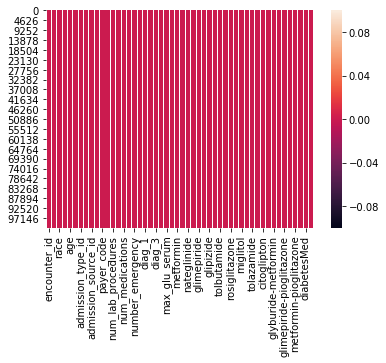

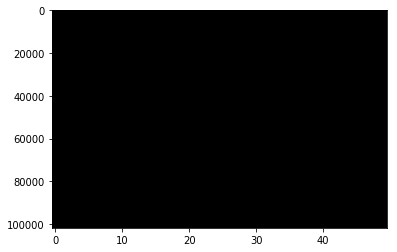

(101766, 50)

In [3]:
missing = pd.isnull(data)
heatmap = sns.heatmap(missing)
missing.head(3)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(missing, aspect = 'auto', cmap = plt.cm.gray, interpolation = 'nearest')
plt.show()
data.shape

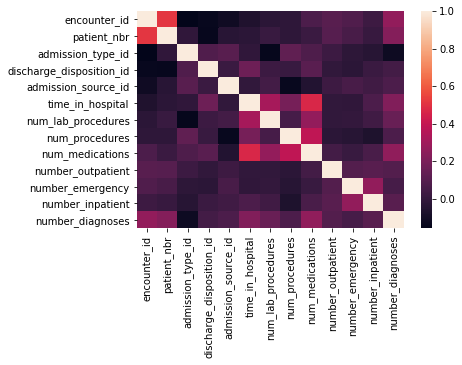

In [4]:
corr = data.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)
plt.show()

In [5]:
#find column names
list(data)
#find the data type of variable
data.dtypes
#find unique variables in each column
data.apply(lambda x: set(x))

encounter_id                {77856768, 173015040, 84934662, 273678342, 175...
patient_nbr                 {33947649, 92667906, 82706436, 83623941, 12831...
race                        {?, AfricanAmerican, Caucasian, Asian, Hispani...
gender                                        {Unknown/Invalid, Male, Female}
age                         {[50-60), [10-20), [70-80), [80-90), [30-40), ...
weight                      {?, [150-175), [0-25), [25-50), >200, [125-150...
admission_type_id                                    {1, 2, 3, 4, 5, 6, 7, 8}
discharge_disposition_id    {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
admission_source_id         {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17...
time_in_hospital              {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
payer_code                  {?, FR, SP, BC, SI, OT, CH, MD, WC, MP, HM, OG...
medical_specialty           {Orthopedics, Surgery-Pediatric, Cardiology, R...
num_lab_procedures          {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 

In [6]:
#drop encounter_id, patient_nbr and weight columns
data = data.drop(['encounter_id', 'patient_nbr', 'weight',
           'examide', 'citoglipton'], axis = 1)

In [7]:
data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,?,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,?,?,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,?,?,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,?,?,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,?,?,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,?,?,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3,1,2,4,?,?,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1,1,7,5,?,?,73,...,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2,1,4,13,?,?,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3,3,4,12,?,InternalMedicine,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
#find unique values in each column
unique = data.apply(lambda x: set(x))
unique


race                        {?, AfricanAmerican, Caucasian, Asian, Hispani...
gender                                        {Unknown/Invalid, Male, Female}
age                         {[50-60), [10-20), [70-80), [80-90), [30-40), ...
admission_type_id                                    {1, 2, 3, 4, 5, 6, 7, 8}
discharge_disposition_id    {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
admission_source_id         {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17...
time_in_hospital              {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
payer_code                  {?, FR, SP, BC, SI, OT, CH, MD, WC, MP, HM, OG...
medical_specialty           {Orthopedics, Surgery-Pediatric, Cardiology, R...
num_lab_procedures          {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
num_procedures                                          {0, 1, 2, 3, 4, 5, 6}
num_medications             {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
number_outpatient           {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1

In [9]:
#replace ?, none and None by NaN
data = data.replace('?', np.nan)
data = data.replace('none', np.nan)
data = data.replace('None', np.nan)
data = data.replace('Unknown/Invalid', np.nan)
data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,NaN,NaN,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3,1,2,4,NaN,NaN,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1,1,7,5,NaN,NaN,73,...,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2,1,4,13,NaN,NaN,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3,3,4,12,NaN,InternalMedicine,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
#count number of nan vlues
data.isnull().sum()

race                         2273
gender                          3
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

In [11]:
#drop race, payer_code, medical_specialty, diag_3, max_glu_serum, A1Cresult
data = data.drop(['race','payer_code', 'medical_specialty', 'diag_3', 
                  'max_glu_serum', 'A1Cresult'], axis = 1)
data

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Female,[0-10),6,25,1,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,Female,[10-20),1,1,7,3,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,Female,[20-30),1,1,7,2,11,5,13,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,Male,[30-40),1,1,7,2,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Male,[40-50),1,1,7,1,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Male,[50-60),2,1,2,3,31,6,16,0,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Male,[60-70),3,1,2,4,70,1,21,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Male,[70-80),1,1,7,5,73,0,12,0,...,No,No,No,No,No,No,No,No,Yes,>30
8,Female,[80-90),2,1,4,13,68,2,28,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Female,[90-100),3,3,4,12,33,3,18,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [12]:
data.dtypes

gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
number_diagnoses             int64
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone        

In [13]:
#select columns that are object data type
obj_df = data.select_dtypes(include = ['object']).copy()
obj_df.head()

,gender,age,diag_1,diag_2,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Female,[0-10),250.83,NaN,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,NO
1,Female,[10-20),276,250.01,No,No,No,No,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,Female,[20-30),648,250,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,Yes,NO
3,Male,[30-40),8,250.43,No,No,No,No,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Male,[40-50),197,157,No,No,No,No,No,No,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [14]:
#select all the rows that have Nan
obj_df[obj_df.isnull().any(axis = 1)]

,gender,age,diag_1,diag_2,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Female,[0-10),250.83,NaN,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,NO
66,Male,[10-20),250.11,NaN,No,No,No,No,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,NO
216,Female,[0-10),250.03,NaN,No,No,No,No,No,No,...,No,Steady,No,No,No,No,No,No,Yes,NO
263,Female,[30-40),250.8,NaN,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,NO
431,Female,[20-30),250.13,NaN,No,No,No,No,No,No,...,No,Down,No,No,No,No,No,Ch,Yes,>30
455,Male,[10-20),250.03,NaN,Steady,No,No,No,No,No,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
518,Male,[60-70),NaN,780,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,NO
933,Male,[10-20),250.13,NaN,No,No,No,No,No,No,...,No,Down,No,No,No,No,No,Ch,Yes,NO
968,Male,[20-30),250.13,NaN,No,No,No,No,No,No,...,No,Down,No,No,No,No,No,Ch,Yes,NO
996,Male,[0-10),250.13,NaN,No,No,No,No,No,No,...,No,Steady,No,No,No,No,No,No,Yes,NO


In [15]:
#find columns that have Nan
obj_df.isnull().sum()
#diag_1 and diag_2 have Nan

gender                        3
age                           0
diag_1                       21
diag_2                      358
metformin                     0
repaglinide                   0
nateglinide                   0
chlorpropamide                0
glimepiride                   0
acetohexamide                 0
glipizide                     0
glyburide                     0
tolbutamide                   0
pioglitazone                  0
rosiglitazone                 0
acarbose                      0
miglitol                      0
troglitazone                  0
tolazamide                    0
insulin                       0
glyburide-metformin           0
glipizide-metformin           0
glimepiride-pioglitazone      0
metformin-rosiglitazone       0
metformin-pioglitazone        0
change                        0
diabetesMed                   0
readmitted                    0
dtype: int64

In [16]:
#find the most common value in diag_1
obj_df["diag_1"].value_counts() #428
#replace Nan by the most common value
obj_df = obj_df.fillna({"diag_1":428})

In [17]:
#find the most common value in diag_2
obj_df['diag_2'].value_counts() #276
#replace Nan by 276
obj_df = obj_df.fillna({'diag_2':276})

In [18]:
#find the most common value in gender
obj_df['gender'].value_counts() #Female
#replace Nan by Female
obj_df = obj_df.fillna({'gender':'Female'})

In [19]:
obj_df.dtypes

gender                      object
age                         object
diag_1                      object
diag_2                      object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide                  object
insulin                     object
glyburide-metformin         object
glipizide-metformin         object
glimepiride-pioglitazone    object
metformin-rosiglitazone     object
metformin-pioglitazone      object
change                      object
diabetesMed                 object
readmitted                  object
dtype: object

In [20]:
obj_df.apply(lambda x: set(x))


gender                                                         {Male, Female}
age                         {[50-60), [10-20), [70-80), [80-90), [30-40), ...
diag_1                      {61, V43, 385, 287, 734, 700, 195, 522, 193, 7...
diag_2                      {V43, 287, 734, 195, V65, 522, 193, 733, 54, V...
metformin                                              {Up, Down, No, Steady}
repaglinide                                            {Up, Down, No, Steady}
nateglinide                                            {Up, Down, No, Steady}
chlorpropamide                                         {Up, Down, No, Steady}
glimepiride                                            {Up, Down, No, Steady}
acetohexamide                                                    {No, Steady}
glipizide                                              {Up, Down, No, Steady}
glyburide                                              {Up, Down, No, Steady}
tolbutamide                                                     

In [21]:
#reference: http://pbpython.com/categorical-encoding.html
#get a list of column names of obj_df
colnames = obj_df.columns
#remove response colum out of colnames
colnames = colnames.delete(27)
#replace by categorical variable with one hot encoding
#using get_dummies() functions
obj_df1 = pd.get_dummies(obj_df, columns = colnames)
obj_df1

,readmitted,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,NO,1,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
1,>30,1,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
2,NO,1,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1
3,NO,0,1,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,1
4,NO,0,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
5,>30,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,1
6,NO,0,1,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
7,>30,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1
8,NO,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
9,NO,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1


In [22]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

/Users/huongvu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
#data slicing to predictor set and response set
X = obj_df1.values[:,1:1553]
Y = obj_df1.values[:,0]
X.shape

(101766, 1551)

In [24]:
#split data set into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3,
                                                    random_state = 100)
X_test.shape

(30530, 1551)

In [25]:
#training decision tree classifier with criterion gini index
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100,
                                  min_samples_split = 5, min_samples_leaf = 5)
clf_gini.fit(X_train, Y_train)                        

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [26]:
#predict 
Y_pred = clf_gini.predict(X_test)
Y_pred

array(['NO', 'NO', '>30', ..., 'NO', '>30', '>30'], dtype=object)

In [27]:
#calculate accuracy score
accuracy_score(Y_test, Y_pred)*100

49.213887979037011

In [28]:
#using information gain method
